In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Problem 2:

## Solution 2.1:

### Basic EDA

In [112]:
df = pd.read_csv('insurance_part2_data.csv')
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [102]:
df.shape

(3000, 10)

In [113]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


### Geting unique counts of all Objects

In [5]:
for feature in df.columns:
    if df[feature].dtype == 'object': 
        print(pd.DataFrame(df[feature].value_counts()))
        print("\n")
        

     Agency_Code
EPX         1365
C2B          924
CWT          472
JZI          239


               Type
Travel Agency  1837
Airlines       1163


     Claimed
No      2076
Yes      924


         Channel
Online      2954
Offline       46


                   Product Name
Customised Plan            1136
Cancellation Plan           678
Bronze Plan                 650
Silver Plan                 427
Gold Plan                   109


          Destination
ASIA             2465
Americas          320
EUROPE            215




### Checking for null  and duplicated values

In [6]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [7]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [8]:
df = df.drop_duplicates()

In [9]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


### Checking for Outliers

<AxesSubplot:>

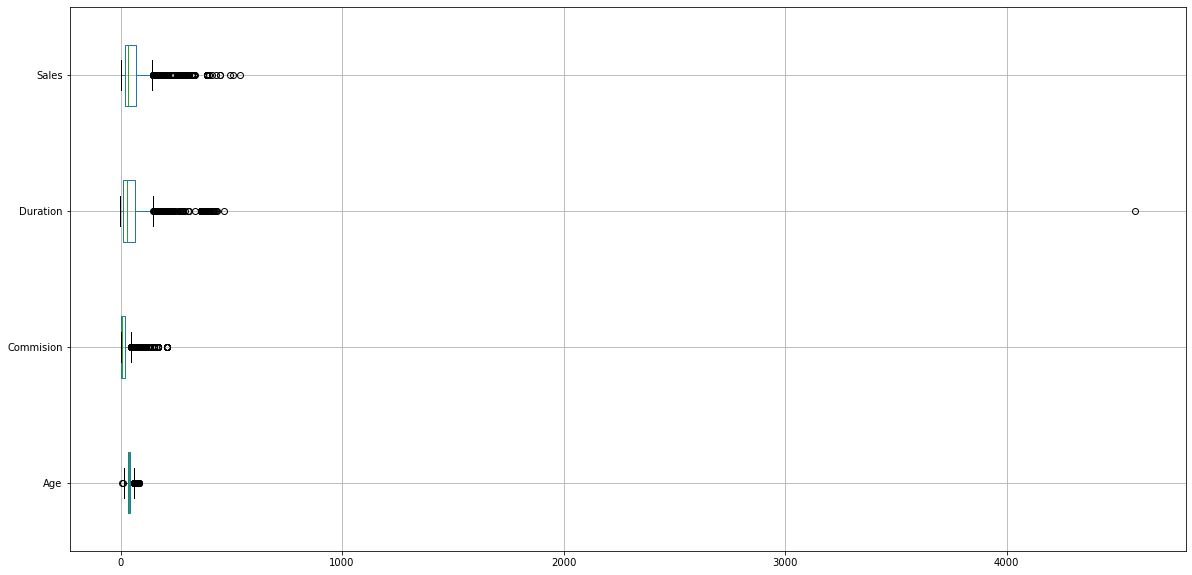

In [11]:
# construct box plot for continuous variables
plt.figure(figsize=(20,10))
df.boxplot(vert=0)

### Treating the Outliers

In [12]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [14]:
for feature in df[['Age', 'Sales', 'Duration', 'Commision']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

<AxesSubplot:>

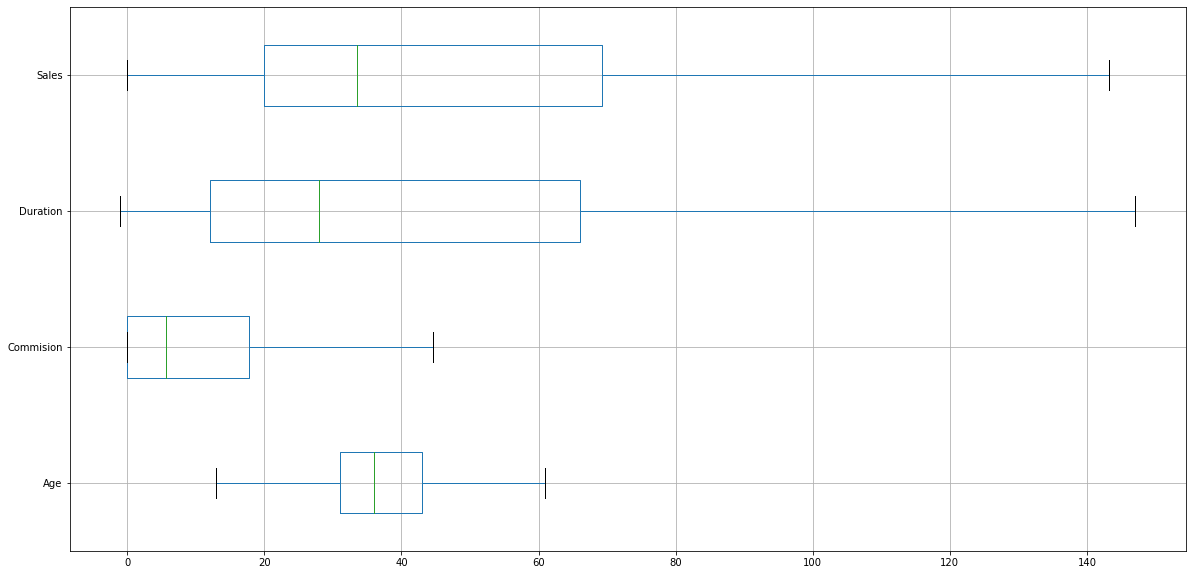

In [15]:
plt.figure(figsize=(20,10))
df.boxplot(vert=0)

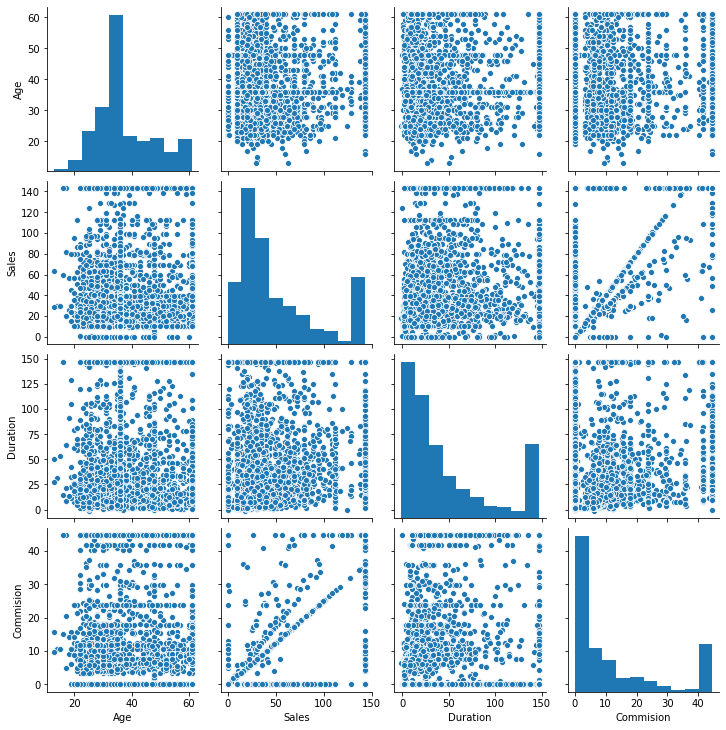

In [16]:
sns.pairplot(df[['Age', 'Sales', 'Duration', 'Commision']])

<AxesSubplot:>

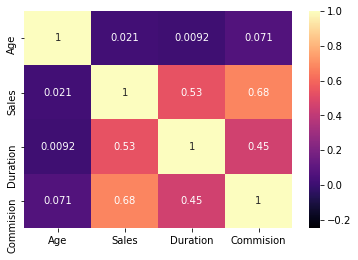

In [17]:
sns.heatmap(df[['Age', 'Sales', 'Duration', 'Commision']].corr(),annot=True,cmap='magma',vmin=-0.25,vmax=1)
# 0: No Relationship
# 0-0.25: Insignificant Relationship
# 0.25-0.5: Weak Relationship
# 0.5-0.75: Strong Relationship
# 0.75-1: Significant Relationship -- Multicollinearity

### Converting the unique values in the independent variables into unique numerical codes

In [19]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print('\n')
        print('Feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



Feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


Feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


Feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


Feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


Feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


Feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [20]:
df

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0
...,...,...,...,...,...,...,...,...,...,...
2995,28.0,1,1,1,44.55,1,147.0,143.25,3,1
2996,35.0,0,0,0,13.50,1,5.0,54.00,3,0
2997,36.0,2,1,0,0.00,1,54.0,28.00,2,0
2998,34.0,0,0,1,7.64,1,39.0,30.55,0,0


### Proportion of 1s and 0s

In [21]:
df['Claimed'].value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

## Solution: 2.2

### Extracting the target column into separate vectors for training set and test set

In [22]:
X = df.drop(["Claimed"], axis=1)

y = df.pop("Claimed")

### Splitting data into training and test set

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)

### Checking the dimensions of the training and test data

In [24]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',X_train.shape[0] + X_test.shape[0])

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)
Total Obs 2861


## Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini') #entropy

In [27]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Insurance_Tree_File = open('Insurance_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=Insurance_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

Insurance_Tree_File.close()

### Variable Importance

In [36]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Sales         0.238779
Duration      0.236948
Agency_Code   0.196651
Age           0.184508
Commision     0.083063
Destination   0.025573
Product Name  0.023539
Channel       0.009486
Type          0.001454


### Predicting Test Data

In [31]:
y_predict = dt_model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
confusion_matrix(test_labels, y_predict)

array([[446, 123],
       [146, 144]], dtype=int64)

In [37]:
print(classification_report(test_labels, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       612
           1       0.56      0.51      0.53       288

    accuracy                           0.71       900
   macro avg       0.67      0.66      0.66       900
weighted avg       0.71      0.71      0.71       900



### Regularising the Decision Tree Adding Tuning Parameters/

### Using Grid Search

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion":['gini'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [15,30,60,100],
    'min_samples_split':[150,200,250,300]
}
dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid=param_grid,cv =10)

In [38]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10, 15, 20],

In [39]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 250}


In [40]:
best_grid = grid_search.best_estimator_
best_grid

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=250,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Generating New Tree

In [41]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Insurance_tree_regularized = open('Regularized_Insurance_tree_file.dot','w')
dot_data = tree.export_graphviz(best_grid, 
                                out_file= Insurance_tree_regularized , 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

Insurance_tree_regularized.close()
dot_data

http://webgraphviz.com/

### Variable Importance

In [42]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.609553
Sales         0.293022
Product Name  0.034838
Duration      0.028678
Commision     0.023513
Age           0.005642
Channel       0.004753
Type          0.000000
Destination   0.000000


### Predicting on Training and Test dataset

In [43]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [44]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (2002,)
ytest_predict (859,)


In [45]:
ytest_predict

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,

### Getting the Predicted Probabilities

In [46]:
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob

array([[0.30630631, 0.69369369],
       [0.86184211, 0.13815789],
       [0.30630631, 0.69369369],
       ...,
       [0.68444444, 0.31555556],
       [0.86184211, 0.13815789],
       [0.41393443, 0.58606557]])

In [47]:
pd.DataFrame(ytest_predict_prob)

,0,1
0,0.306306,0.693694
1,0.861842,0.138158
2,0.306306,0.693694
3,0.684444,0.315556
4,0.413934,0.586066
...,...,...
854,0.702703,0.297297
855,0.413934,0.586066
856,0.684444,0.315556
857,0.861842,0.138158


### Model Evaluation using AUC-ROC Curve

### AUC and ROC for the training data

AUC: 0.824


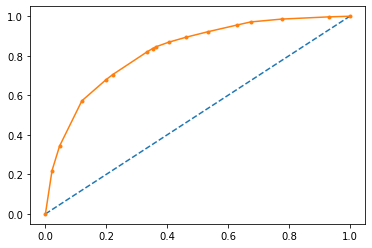

In [48]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.771


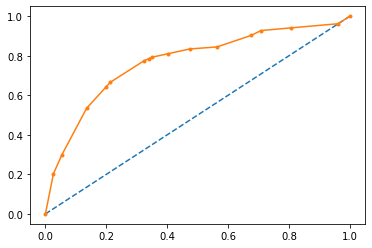

In [49]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')
# show the plot
plt.show()

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

## Confusion Matrix for the training data

In [51]:
confusion_matrix(train_labels, ytrain_predict)

array([[1213,  165],
       [ 267,  357]], dtype=int64)

In [52]:
#Train Data Accuracy
best_grid.score(X_train,train_labels)

0.7842157842157842

In [53]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels)
cart_train_acc

0.7842157842157842

In [54]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1378
           1       0.68      0.57      0.62       624

    accuracy                           0.78      2002
   macro avg       0.75      0.73      0.74      2002
weighted avg       0.78      0.78      0.78      2002



In [55]:
cart_metrics = classification_report(train_labels,ytrain_predict,output_dict=True)
df = pd.DataFrame(cart_metrics).transpose()
df
cart_train_precision = round(df.loc["1"][0],2)
cart_train_recall = round(df.loc["1"][1],2)
cart_train_f1 = round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.68
cart_train_recall  0.57
cart_train_f1  0.62


## Confusion Matrix for test data

In [56]:
confusion_matrix(test_labels, ytest_predict)

array([[492,  77],
       [135, 155]], dtype=int64)

In [57]:
best_grid.score(X_test,test_labels) 

0.7532013969732246

In [58]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7532013969732246

In [59]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       569
           1       0.67      0.53      0.59       290

    accuracy                           0.75       859
   macro avg       0.73      0.70      0.71       859
weighted avg       0.75      0.75      0.75       859



In [60]:
cart_metrics = classification_report(test_labels,ytest_predict,output_dict=True)
df = pd.DataFrame(cart_metrics).transpose()
df
cart_test_precision = round(df.loc["1"][0],2)
cart_test_recall = round(df.loc["1"][1],2)
cart_test_f1 = round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.68
cart_train_recall  0.57
cart_train_f1  0.62


## Cart Conclusion

### Train Data:
AUC: 82.4%
Accuracy: 78%
Precision: 68%
f1-Score: 62%

### Test Data:
AUC: 77.1%
Accuracy: 75%
Precision: 67%
f1-Score: 59%

Training and Test set results have minor differences, and with average overall measures, The model can be considered as a good model.

Agency_Code is the most important variable for predicting Claim Status.

## Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
param_grid = {
    'oob_score': [True],
    'max_depth': [10,15,20],
    'max_features': [3,4,5],
    'min_samples_leaf': [20,30,50],
    'min_samples_split': [60,90,150], 
    'n_estimators': [301,501]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [67]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [68]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 301,
 'oob_score': True}

In [69]:
best_grid = grid_search.best_estimator_

In [70]:
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, n_estimators=301,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [71]:
best_grid.oob_score_

0.7822177822177823

In [72]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.313521
Product Name  0.220025
Sales         0.184755
Commision     0.099328
Duration      0.072109
Type          0.057193
Age           0.041712
Destination   0.009604
Channel       0.001754


## Predicting the Training and Testing data

In [73]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### Confusion Matrix for train and data

In [76]:
from sklearn.metrics import confusion_matrix,classification_report

In [77]:
confusion_matrix(train_labels,ytrain_predict)

array([[1233,  145],
       [ 256,  368]], dtype=int64)

In [78]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.7997002997002997

### Confusion Matrix for test data

In [79]:
confusion_matrix(test_labels,ytest_predict)

array([[498,  71],
       [134, 156]], dtype=int64)

In [80]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7613504074505238

### Classification Report for train data

In [81]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1378
           1       0.72      0.59      0.65       624

    accuracy                           0.80      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.80      0.79      2002



In [82]:
rf_metrics = classification_report(train_labels,ytrain_predict,output_dict=True)
df1 = pd.DataFrame(rf_metrics).transpose()
df1
rf_train_precision = round(df1.loc["1"][0],2)
rf_train_recall = round(df1.loc["1"][1],2)
rf_train_f1 = round(df1.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.59
rf_train_f1  0.65


### Classification Report for test data

In [83]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       569
           1       0.69      0.54      0.60       290

    accuracy                           0.76       859
   macro avg       0.74      0.71      0.72       859
weighted avg       0.75      0.76      0.75       859



In [84]:
rf_metrics = classification_report(test_labels,ytest_predict,output_dict=True)
df1 = pd.DataFrame(rf_metrics).transpose()
df1
rf_test_precision = round(df1.loc["1"][0],2)
rf_test_recall = round(df1.loc["1"][1],2)
rf_test_f1 = round(df1.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.69
rf_test_recall  0.54
rf_test_f1  0.6


### AUC and ROC for the training data

AUC: 0.851


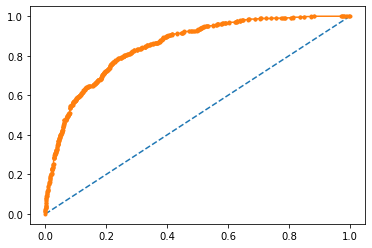

In [85]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_train_fpr, rf_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.798


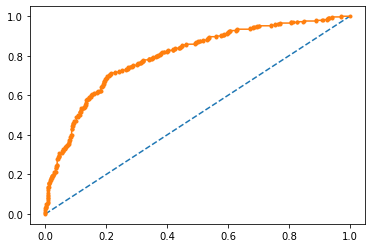

In [86]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rf_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rf_test_fpr, rf_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr, marker='.')
# show the plot
plt.show()

### Building Neural Network Model

In [87]:
from sklearn.preprocessing import StandardScaler 
#Initialize an object for StandardScaler
sc = StandardScaler()

In [88]:
X_train = sc.fit_transform(X_train)
X_train

array([[-0.19158362,  0.7144367 ,  0.82092207, ..., -0.96653588,
        -0.52656514, -0.44760203],
       [-0.19158362,  0.7144367 ,  0.82092207, ..., -0.82602536,
        -0.52656514, -0.44760203],
       [-0.60378182,  0.7144367 ,  0.82092207, ..., -0.73235168,
         0.25896646, -0.44760203],
       ...,
       [-1.11902955, -1.27762775, -1.21814243, ...,  0.5416104 ,
         1.83002967, -0.44760203],
       [-0.19158362,  0.7144367 ,  0.82092207, ..., -0.94311746,
        -0.52656514, -0.44760203],
       [-0.19158362,  0.7144367 ,  0.82092207, ...,  0.8366825 ,
         0.25896646, -0.44760203]])

In [89]:
# Apply the transformation on the test data
X_test = sc.transform(X_test)
X_test

array([[ 0.63281276, -1.27762775, -1.21814243, ...,  2.15396865,
        -1.31209675, -0.44760203],
       [ 0.83891185, -0.28159552,  0.82092207, ..., -0.96887773,
         0.25896646,  1.25600874],
       [ 0.22061457, -1.27762775, -1.21814243, ...,  0.70788118,
         1.83002967, -0.44760203],
       ...,
       [-0.19158362,  0.7144367 ,  0.82092207, ..., -0.24056485,
         0.25896646, -0.44760203],
       [-0.19158362,  0.7144367 ,  0.82092207, ..., -0.70893326,
         0.25896646, -0.44760203],
       [-1.01598001, -1.27762775, -1.21814243, ..., -0.76747931,
         1.83002967, -0.44760203]])

In [90]:
from sklearn.neural_network import MLPClassifier

In [91]:
param_grid = {
    'hidden_layer_sizes': [100,200,300],
    'max_iter': [2500,3000,5000],
    'solver': ['adam','sgd'],
    'verbose': [True],
    'tol': [0.01]
}

clf = MLPClassifier()

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 10)

In [92]:
grid_search.fit(X_train,train_labels)

Iteration 1, loss = 0.62839427
Iteration 2, loss = 0.56887053
Iteration 3, loss = 0.53752878
Iteration 4, loss = 0.51968681
Iteration 5, loss = 0.50959498
Iteration 6, loss = 0.50659118
Iteration 7, loss = 0.50510060
Iteration 8, loss = 0.50439346
Iteration 9, loss = 0.50190814
Iteration 10, loss = 0.49961377
Iteration 11, loss = 0.49736538
Iteration 12, loss = 0.49659136
Iteration 13, loss = 0.49638544
Iteration 14, loss = 0.49577111
Iteration 15, loss = 0.49470682
Iteration 16, loss = 0.49376084
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.72898770
Iteration 2, loss = 0.65058866
Iteration 3, loss = 0.60006938
Iteration 4, loss = 0.56631969
Iteration 5, loss = 0.54119855
Iteration 6, loss = 0.52269817
Iteration 7, loss = 0.51038890
Iteration 8, loss = 0.50290474
Iteration 9, loss = 0.49920972
Iteration 10, loss = 0.49808035
Iteration 11, loss = 0.49702491
Iteration 12, loss = 0.49684913
Iteration 13, loss = 0.49558079


Iteration 7, loss = 0.60926458
Iteration 8, loss = 0.59543703
Iteration 9, loss = 0.58464112
Iteration 10, loss = 0.57514578
Iteration 11, loss = 0.56724206
Iteration 12, loss = 0.55991704
Iteration 13, loss = 0.55344998
Iteration 14, loss = 0.54735631
Iteration 15, loss = 0.54186294
Iteration 16, loss = 0.53802745
Iteration 17, loss = 0.53406899
Iteration 18, loss = 0.53041985
Iteration 19, loss = 0.52684053
Iteration 20, loss = 0.52353789
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.72595528
Iteration 2, loss = 0.70620428
Iteration 3, loss = 0.68193778
Iteration 4, loss = 0.65925852
Iteration 5, loss = 0.63831914
Iteration 6, loss = 0.62051288
Iteration 7, loss = 0.60496583
Iteration 8, loss = 0.59022075
Iteration 9, loss = 0.57828445
Iteration 10, loss = 0.56856526
Iteration 11, loss = 0.55993783
Iteration 12, loss = 0.55282361
Iteration 13, loss = 0.54588342
Iteration 14, loss = 0.54057463
Iteration 15, loss = 0.535

Iteration 8, loss = 0.51121531
Iteration 9, loss = 0.50616896
Iteration 10, loss = 0.50322374
Iteration 11, loss = 0.50145873
Iteration 12, loss = 0.49996494
Iteration 13, loss = 0.49901577
Iteration 14, loss = 0.49814808
Iteration 15, loss = 0.49599267
Iteration 16, loss = 0.49545789
Iteration 17, loss = 0.49530814
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.74810360
Iteration 2, loss = 0.66089032
Iteration 3, loss = 0.60717190
Iteration 4, loss = 0.56896011
Iteration 5, loss = 0.54398048
Iteration 6, loss = 0.52627962
Iteration 7, loss = 0.51436503
Iteration 8, loss = 0.50793159
Iteration 9, loss = 0.50479800
Iteration 10, loss = 0.50186566
Iteration 11, loss = 0.49913425
Iteration 12, loss = 0.49731458
Iteration 13, loss = 0.49592231
Iteration 14, loss = 0.49516579
Iteration 15, loss = 0.49475819
Iteration 16, loss = 0.49396497
Iteration 17, loss = 0.49359942
Iteration 18, loss = 0.49357313
Training loss did not imp

Iteration 9, loss = 0.57715058
Iteration 10, loss = 0.56810809
Iteration 11, loss = 0.55915602
Iteration 12, loss = 0.55141215
Iteration 13, loss = 0.54480543
Iteration 14, loss = 0.53912281
Iteration 15, loss = 0.53463990
Iteration 16, loss = 0.53162656
Iteration 17, loss = 0.52920688
Iteration 18, loss = 0.52670822
Iteration 19, loss = 0.52406168
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61449865
Iteration 2, loss = 0.60650833
Iteration 3, loss = 0.59631009
Iteration 4, loss = 0.58586809
Iteration 5, loss = 0.57530508
Iteration 6, loss = 0.56608138
Iteration 7, loss = 0.55730990
Iteration 8, loss = 0.54982815
Iteration 9, loss = 0.54380643
Iteration 10, loss = 0.53853761
Iteration 11, loss = 0.53355717
Iteration 12, loss = 0.52934113
Iteration 13, loss = 0.52544767
Iteration 14, loss = 0.52231439
Iteration 15, loss = 0.52010435
Iteration 16, loss = 0.51822760
Training loss did not improve more than tol=0.010000 for

Iteration 9, loss = 0.53943966
Iteration 10, loss = 0.53683340
Iteration 11, loss = 0.53357219
Iteration 12, loss = 0.53080356
Iteration 13, loss = 0.52802997
Iteration 14, loss = 0.52556281
Iteration 15, loss = 0.52260140
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70264508
Iteration 2, loss = 0.68618668
Iteration 3, loss = 0.66798129
Iteration 4, loss = 0.64979195
Iteration 5, loss = 0.63313265
Iteration 6, loss = 0.61956973
Iteration 7, loss = 0.60609811
Iteration 8, loss = 0.59356729
Iteration 9, loss = 0.58419299
Iteration 10, loss = 0.57784650
Iteration 11, loss = 0.57089319
Iteration 12, loss = 0.56316043
Iteration 13, loss = 0.55584692
Iteration 14, loss = 0.54916789
Iteration 15, loss = 0.54372484
Iteration 16, loss = 0.53874650
Iteration 17, loss = 0.53402003
Iteration 18, loss = 0.52989976
Iteration 19, loss = 0.52570411
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping

Iteration 7, loss = 0.48490049
Iteration 8, loss = 0.48314574
Iteration 9, loss = 0.48210571
Iteration 10, loss = 0.48235648
Iteration 11, loss = 0.48083723
Iteration 12, loss = 0.48005990
Iteration 13, loss = 0.47945599
Iteration 14, loss = 0.47912803
Iteration 15, loss = 0.47883753
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.65922741
Iteration 2, loss = 0.57650889
Iteration 3, loss = 0.53608710
Iteration 4, loss = 0.51499450
Iteration 5, loss = 0.50315425
Iteration 6, loss = 0.49818005
Iteration 7, loss = 0.49593314
Iteration 8, loss = 0.49448052
Iteration 9, loss = 0.49330540
Iteration 10, loss = 0.49227926
Iteration 11, loss = 0.49147864
Iteration 12, loss = 0.49109372
Iteration 13, loss = 0.49083266
Iteration 14, loss = 0.49204705
Iteration 15, loss = 0.49246088
Iteration 16, loss = 0.49149903
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.66684838
I

Iteration 2, loss = 0.71143067
Iteration 3, loss = 0.68749973
Iteration 4, loss = 0.66586000
Iteration 5, loss = 0.64619024
Iteration 6, loss = 0.62820894
Iteration 7, loss = 0.61084028
Iteration 8, loss = 0.59667439
Iteration 9, loss = 0.58430530
Iteration 10, loss = 0.57517672
Iteration 11, loss = 0.56708397
Iteration 12, loss = 0.56076600
Iteration 13, loss = 0.55487225
Iteration 14, loss = 0.54997045
Iteration 15, loss = 0.54695891
Iteration 16, loss = 0.54349800
Iteration 17, loss = 0.53945771
Iteration 18, loss = 0.53570698
Iteration 19, loss = 0.53227366
Iteration 20, loss = 0.52960248
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.74288200
Iteration 2, loss = 0.72073496
Iteration 3, loss = 0.69352097
Iteration 4, loss = 0.66626921
Iteration 5, loss = 0.64184915
Iteration 6, loss = 0.62231797
Iteration 7, loss = 0.60602238
Iteration 8, loss = 0.59121771
Iteration 9, loss = 0.57941311
Iteration 10, loss = 0.57008374

Iteration 17, loss = 0.53343774
Iteration 18, loss = 0.53018113
Iteration 19, loss = 0.52698070
Iteration 20, loss = 0.52394758
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.76870500
Iteration 2, loss = 0.73971845
Iteration 3, loss = 0.70564976
Iteration 4, loss = 0.67341408
Iteration 5, loss = 0.65139168
Iteration 6, loss = 0.63300534
Iteration 7, loss = 0.61503539
Iteration 8, loss = 0.60119460
Iteration 9, loss = 0.58826843
Iteration 10, loss = 0.57720957
Iteration 11, loss = 0.56779266
Iteration 12, loss = 0.55938940
Iteration 13, loss = 0.55232365
Iteration 14, loss = 0.54581230
Iteration 15, loss = 0.54198646
Iteration 16, loss = 0.53860251
Iteration 17, loss = 0.53474952
Iteration 18, loss = 0.53250651
Iteration 19, loss = 0.52975524
Iteration 20, loss = 0.52609734
Iteration 21, loss = 0.52248107
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.6847589

Iteration 7, loss = 0.49803633
Iteration 8, loss = 0.49423924
Iteration 9, loss = 0.49428669
Iteration 10, loss = 0.49305326
Iteration 11, loss = 0.49183623
Iteration 12, loss = 0.48930216
Iteration 13, loss = 0.48826328
Iteration 14, loss = 0.48795697
Iteration 15, loss = 0.48859939
Iteration 16, loss = 0.48832506
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61924511
Iteration 2, loss = 0.55216741
Iteration 3, loss = 0.52114239
Iteration 4, loss = 0.50576316
Iteration 5, loss = 0.49971097
Iteration 6, loss = 0.49605729
Iteration 7, loss = 0.49260974
Iteration 8, loss = 0.49097114
Iteration 9, loss = 0.48995053
Iteration 10, loss = 0.48675111
Iteration 11, loss = 0.48727061
Iteration 12, loss = 0.48734798
Iteration 13, loss = 0.48799990
Iteration 14, loss = 0.48704008
Iteration 15, loss = 0.48496213
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62092461
I

Iteration 9, loss = 0.55550119
Iteration 10, loss = 0.54776078
Iteration 11, loss = 0.54067865
Iteration 12, loss = 0.53443011
Iteration 13, loss = 0.52979600
Iteration 14, loss = 0.52676361
Iteration 15, loss = 0.52374541
Iteration 16, loss = 0.52044031
Iteration 17, loss = 0.51739186
Iteration 18, loss = 0.51458975
Iteration 19, loss = 0.51209901
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.66770508
Iteration 2, loss = 0.65603891
Iteration 3, loss = 0.64230313
Iteration 4, loss = 0.62718983
Iteration 5, loss = 0.61291989
Iteration 6, loss = 0.59986593
Iteration 7, loss = 0.58853189
Iteration 8, loss = 0.57864109
Iteration 9, loss = 0.57003192
Iteration 10, loss = 0.56255041
Iteration 11, loss = 0.55549734
Iteration 12, loss = 0.54963793
Iteration 13, loss = 0.54526310
Iteration 14, loss = 0.54126553
Iteration 15, loss = 0.53859704
Iteration 16, loss = 0.53580191
Iteration 17, loss = 0.53403893
Iteration 18, loss = 0.5

Iteration 3, loss = 0.51278677
Iteration 4, loss = 0.49965761
Iteration 5, loss = 0.49618858
Iteration 6, loss = 0.49302864
Iteration 7, loss = 0.49117134
Iteration 8, loss = 0.48826142
Iteration 9, loss = 0.48754043
Iteration 10, loss = 0.48647180
Iteration 11, loss = 0.48557596
Iteration 12, loss = 0.48512038
Iteration 13, loss = 0.48381137
Iteration 14, loss = 0.48251591
Iteration 15, loss = 0.48183819
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.67160965
Iteration 2, loss = 0.65432641
Iteration 3, loss = 0.63285598
Iteration 4, loss = 0.61281498
Iteration 5, loss = 0.59757497
Iteration 6, loss = 0.58505081
Iteration 7, loss = 0.57574683
Iteration 8, loss = 0.56798969
Iteration 9, loss = 0.56223784
Iteration 10, loss = 0.55601695
Iteration 11, loss = 0.55161179
Iteration 12, loss = 0.54769472
Iteration 13, loss = 0.54255665
Iteration 14, loss = 0.53800330
Iteration 15, loss = 0.53410325
Iteration 16, loss = 0.5298008

Iteration 13, loss = 0.49176918
Iteration 14, loss = 0.49227442
Iteration 15, loss = 0.49109548
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63986311
Iteration 2, loss = 0.55572036
Iteration 3, loss = 0.52149848
Iteration 4, loss = 0.50684258
Iteration 5, loss = 0.50051437
Iteration 6, loss = 0.49722701
Iteration 7, loss = 0.49454301
Iteration 8, loss = 0.49246850
Iteration 9, loss = 0.49090574
Iteration 10, loss = 0.48945519
Iteration 11, loss = 0.49101059
Iteration 12, loss = 0.49279387
Iteration 13, loss = 0.49106127
Iteration 14, loss = 0.48889061
Iteration 15, loss = 0.48748656
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.66013486
Iteration 2, loss = 0.56181303
Iteration 3, loss = 0.52245382
Iteration 4, loss = 0.50462445
Iteration 5, loss = 0.49713233
Iteration 6, loss = 0.49334839
Iteration 7, loss = 0.49168213
Iteration 8, loss = 0.49012128
Itera

Iteration 3, loss = 0.65850424
Iteration 4, loss = 0.63877380
Iteration 5, loss = 0.62223681
Iteration 6, loss = 0.60726641
Iteration 7, loss = 0.59644947
Iteration 8, loss = 0.58610095
Iteration 9, loss = 0.57592859
Iteration 10, loss = 0.56660137
Iteration 11, loss = 0.55863800
Iteration 12, loss = 0.55184281
Iteration 13, loss = 0.54574026
Iteration 14, loss = 0.53980845
Iteration 15, loss = 0.53446138
Iteration 16, loss = 0.52979797
Iteration 17, loss = 0.52579091
Iteration 18, loss = 0.52237521
Iteration 19, loss = 0.51964502
Iteration 20, loss = 0.51687014
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68755317
Iteration 2, loss = 0.67411681
Iteration 3, loss = 0.65730989
Iteration 4, loss = 0.63947094
Iteration 5, loss = 0.62376086
Iteration 6, loss = 0.61113537
Iteration 7, loss = 0.60031541
Iteration 8, loss = 0.59164308
Iteration 9, loss = 0.58393922
Iteration 10, loss = 0.57577090
Iteration 11, loss = 0.5687853

Iteration 14, loss = 0.49031639
Iteration 15, loss = 0.49115661
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.65919130
Iteration 2, loss = 0.56966718
Iteration 3, loss = 0.52628886
Iteration 4, loss = 0.50681284
Iteration 5, loss = 0.49551094
Iteration 6, loss = 0.49255111
Iteration 7, loss = 0.49084230
Iteration 8, loss = 0.48925183
Iteration 9, loss = 0.48873469
Iteration 10, loss = 0.48787983
Iteration 11, loss = 0.48604615
Iteration 12, loss = 0.48394783
Iteration 13, loss = 0.48399659
Iteration 14, loss = 0.48280982
Iteration 15, loss = 0.48106916
Iteration 16, loss = 0.48222771
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68934180
Iteration 2, loss = 0.66833797
Iteration 3, loss = 0.64331085
Iteration 4, loss = 0.62021334
Iteration 5, loss = 0.60207750
Iteration 6, loss = 0.58780075
Iteration 7, loss = 0.57627797
Iteration 8, loss = 0.56576447
Itera

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid

In [93]:
grid_search.best_params_

{'hidden_layer_sizes': 300,
 'max_iter': 5000,
 'solver': 'adam',
 'tol': 0.01,
 'verbose': True}

In [94]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.1, verbose=True,
              warm_start=False)

### Predicting on training and test data

In [95]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### Confusion matrix of training data

In [96]:
confusion_matrix(train_labels,ytrain_predict)

array([[1171,  207],
       [ 246,  378]], dtype=int64)

In [97]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7737262737262737

### Confusion matrix of test data 

In [98]:
confusion_matrix(test_labels,ytest_predict)

array([[480,  89],
       [120, 170]], dtype=int64)

In [99]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7566938300349243

### Classification report of training data

In [100]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1378
           1       0.65      0.61      0.63       624

    accuracy                           0.77      2002
   macro avg       0.74      0.73      0.73      2002
weighted avg       0.77      0.77      0.77      2002



### Classification report of test data

In [101]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       569
           1       0.66      0.59      0.62       290

    accuracy                           0.76       859
   macro avg       0.73      0.71      0.72       859
weighted avg       0.75      0.76      0.75       859



In [102]:
nn_metrics = classification_report(train_labels,ytrain_predict,output_dict=True)
df2 = pd.DataFrame(nn_metrics).transpose()
nn_train_precision = round(df2.loc["1"][0],2)
nn_train_recall = round(df2.loc["1"][1],2)
nn_train_f1 = round(df2.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.65
nn_train_recall  0.61
nn_train_f1  0.63


In [103]:
nn_metrics = classification_report(test_labels,ytest_predict,output_dict=True)
df2 = pd.DataFrame(nn_metrics).transpose()
nn_test_precision = round(df2.loc["1"][0],2)
nn_test_recall = round(df2.loc["1"][1],2)
nn_test_f1 = round(df2.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.66
nn_test_recall  0.59
nn_test_f1  0.62


### AUC and ROC for the train data

AUC: 0.807


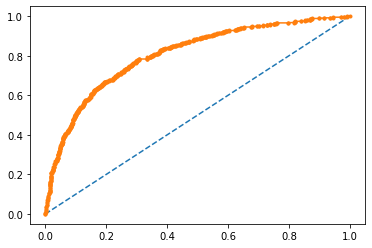

In [106]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
nn_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % nn_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
nn_train_fpr, nn_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nn_train_fpr, nn_train_tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.791


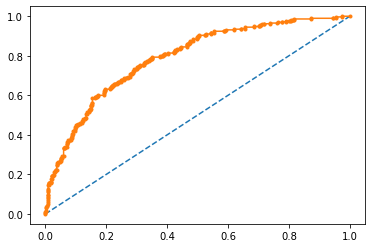

In [107]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
nn_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % nn_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
nn_test_fpr, nn_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nn_test_fpr, nn_test_tpr, marker='.')
# show the plot
plt.show()

## Comparision


In [109]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.75,0.80,0.76,0.77,0.76
AUC,0.82,0.77,0.85,0.80,0.81,0.79
Recall,0.57,0.53,0.59,0.54,0.61,0.59
Precision,0.68,0.67,0.72,0.69,0.65,0.66
F1 Score,0.62,0.59,0.65,0.60,0.63,0.62


## ROC Curve for the 3 models on the Training data

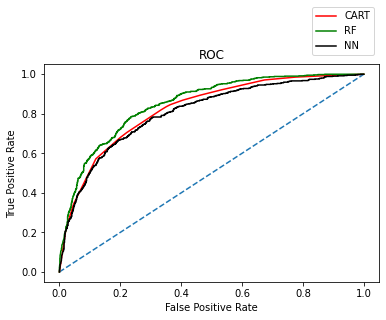

In [110]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

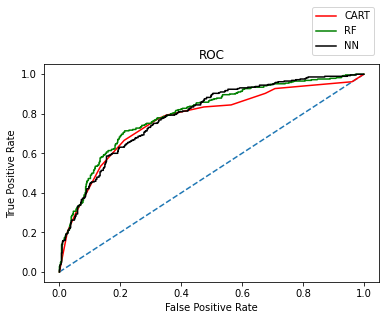

In [111]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')